In [1]:
import torch
import torchvision
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from model import ConvAutoEncoder
from data import DatasetCelebA

In [2]:
AE = ConvAutoEncoder(pretrained=True)

In [8]:
batch_size = 50

dataset = DatasetCelebA(root='../../CelebA/', attr='../../CelebA/list_attr_celeba.csv')
np.random.seed(42)
subset = np.random.choice(len(dataset), 5000, replace=False)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         sampler=torch.utils.data.SubsetRandomSampler(subset),
                                         num_workers=3)

In [9]:
def change_gender(model, dataloader, n_images=5, img_size=4):
    YOUNG_INDEX = 39
    BLOND_INDEX = 9
    ATTRACTIVE_INDEX = 2
    img, attrs = next(iter(dataloader))

    young_blond = torch.stack((attrs.data[:, YOUNG_INDEX],
                               attrs.data[:, BLOND_INDEX]), dim=1)

    male_attractive = torch.stack((torch.ones(batch_size),
                                   attrs.data[:, ATTRACTIVE_INDEX]), dim=1)
    features = torch.stack((young_blond, male_attractive), dim=2).reshape(-1, 1, 2, 2)
    reconstructed_male = AE(img, features).permute(0, 2, 3, 1).data.numpy()

    female_attractive = torch.stack((torch.zeros(batch_size),
                                     attrs.data[:, ATTRACTIVE_INDEX]), dim=1)
    features = torch.stack((young_blond, female_attractive), dim=2).reshape(-1, 1, 2, 2)
    reconstructed_female = AE(img, features).permute(0, 2, 3, 1).data.numpy()

    for i in range(n_images):
        plt.figure(figsize=(3 * img_size, n_images * img_size))
        plt.subplot(n_images, 3, 1)
        plt.imshow(img[i].permute(1, 2, 0))
        plt.axis('off')

        plt.subplot(n_images, 3, 2)
        plt.imshow((reconstructed_male[i] * 255).astype(np.uint8))
        plt.axis('off')

        plt.subplot(n_images, 3, 3)
        plt.imshow((reconstructed_female[i] * 255).astype(np.uint8))
        plt.axis('off')

    plt.show()

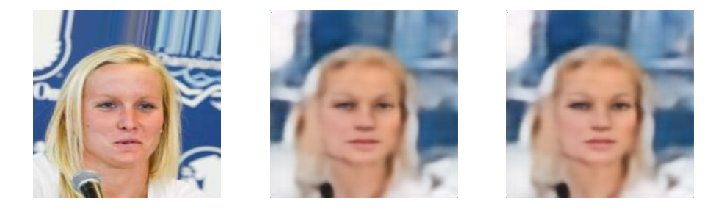

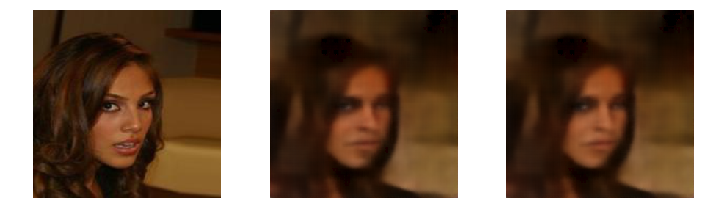

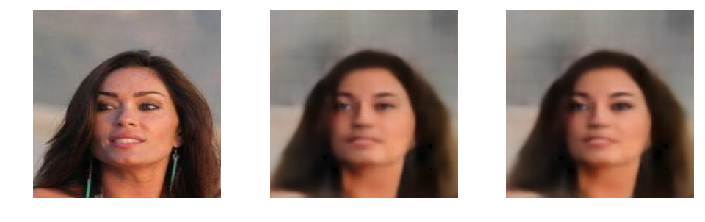

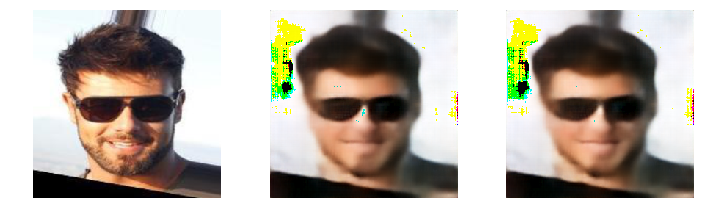

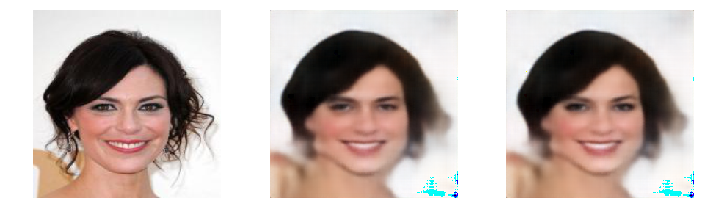

CPU times: user 40.6 s, sys: 1.48 s, total: 42.1 s
Wall time: 21.9 s


In [10]:
%%time

change_gender(AE, dataloader)